In [1]:
! pip install --upgrade tensorflow scikit-learn numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 769.5 kB/s eta 0:00:000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 24.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 8.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 19.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 30.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 25.6 MB/s e

### Step 1: Import Libraries and Load Data

In [3]:
# Load the California Housing datasetimport numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [4]:
cal_data = fetch_california_housing()
X = cal_data.data
y = cal_data.target

print("Data shape:", X.shape)        # Should be (20640, 8)
print("Target shape:", y.shape)      # Should be (20640,)

Data shape: (20640, 8)
Target shape: (20640,)


### Step 2: Create a Validation Split

In [5]:
# Split into train and test first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Further split train data into train and validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Training data shape:", X_train_final.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)


Training data shape: (13209, 8)
Validation data shape: (3303, 8)
Test data shape: (4128, 8)


### Step 3: Normalize the Data

In [6]:
scaler = StandardScaler()
scaler.fit(X_train_final)

X_train_scaled = scaler.transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Feature means:", scaler.mean_)
print("Feature variances:", scaler.var_)

Feature means: [ 3.86893364e+00  2.85672647e+01  5.42040408e+00  1.09433536e+00
  1.42691650e+03  3.02944025e+00  3.56468476e+01 -1.19583303e+02]
Feature variances: [3.57143560e+00 1.58482738e+02 4.48993988e+00 1.45205080e-01
 1.29315681e+06 4.70353691e+01 4.55294423e+00 4.02078197e+00]


### Step 4: Build a Baseline Model (No Regularization)

In [7]:
baseline_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

baseline_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_baseline = baseline_model.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0211 - mae: 0.6271 - mse: 1.0211 - val_loss: 0.4878 - val_mae: 0.4877 - val_mse: 0.4878
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4098 - mae: 0.4543 - mse: 0.4098 - val_loss: 0.4712 - val_mae: 0.4551 - val_mse: 0.4712
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3838 - mae: 0.4320 - mse: 0.3838 - val_loss: 0.6763 - val_mae: 0.4461 - val_mse: 0.6763
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3724 - mae: 0.4184 - mse: 0.3724 - val_loss: 0.3872 - val_mae: 0.4247 - val_mse: 0.3872
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3358 - mae: 0.4069 - mse: 0.3358 - val_loss: 0.3715 - val_mae: 0.4185 - val_mse: 0.3715
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3289 - mae: 0.3984 - mse: 0.3289 - val_loss: 0.4100 - val_mae: 0.4309 - val_mse: 0.4100
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3317 - mae: 0.3952 - mse: 0.331

### Step 5: Add Batch Normalization

In [8]:
model_bn = keras.Sequential([
    layers.Dense(64, activation='linear', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(64, activation='linear'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1)
])

model_bn.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_bn = model_bn.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8759 - mae: 0.6483 - mse: 0.8759 - val_loss: 0.7403 - val_mae: 0.4858 - val_mse: 0.7403
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4275 - mae: 0.4730 - mse: 0.4275 - val_loss: 2.4989 - val_mae: 0.4652 - val_mse: 2.4989
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4015 - mae: 0.4543 - mse: 0.4015 - val_loss: 0.5384 - val_mae: 0.4780 - val_mse: 0.5384
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3835 - mae: 0.4453 - mse: 0.3835 - val_loss: 0.4226 - val_mae: 0.4548 - val_mse: 0.4226
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3737 - mae: 0.4390 - mse: 0.3737 - val_loss: 2.0782 - val_mae: 0.4745 - val_mse: 2.0782
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3676 - mae: 0.4306 - mse: 0.3676 - val_loss: 2.4189 - val_mae: 0.4701 - val_mse: 2.4189
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3642 - mae: 0.4280 - mse: 0.364

### Step 6: Incorporate Regularization (L2 + Dropout)

In [9]:
l2_reg = 1e-4
dropout_rate = 0.3

model_reg = keras.Sequential([
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg),
                 input_shape=(X_train.shape[1],)),
    layers.Dropout(dropout_rate),

    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dropout(dropout_rate),

    layers.Dense(1)
])

model_reg.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_reg = model_reg.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.3445 - mae: 0.7831 - mse: 1.3364 - val_loss: 0.7958 - val_mae: 0.5288 - val_mse: 0.7877
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6578 - mae: 0.5722 - mse: 0.6496 - val_loss: 0.4550 - val_mae: 0.4706 - val_mse: 0.4468
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5519 - mae: 0.5298 - mse: 0.5437 - val_loss: 0.4438 - val_mae: 0.4539 - val_mse: 0.4355
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5247 - mae: 0.5125 - mse: 0.5163 - val_loss: 0.4774 - val_mae: 0.4537 - val_mse: 0.4690
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4896 - mae: 0.4954 - mse: 0.4812 - val_loss: 0.4696 - val_mae: 0.4473 - val_mse: 0.4611
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4799 - mae: 0.4877 - mse: 0.4714 - val_loss: 0.3946 - val_mae: 0.4394 - val_mse: 0.3860
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4662 - mae: 0.4805 - mse: 0.457

### Step 7: Evaluate and Compare Models

In [10]:
print("=== Baseline Model ===")
train_scores = baseline_model.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores   = baseline_model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores[1]:.4f}, Train MSE: {train_scores[2]:.4f}")
print(f"Val   MAE: {val_scores[1]:.4f}, Val   MSE: {val_scores[2]:.4f}")

print("\n=== BatchNorm Model ===")
train_scores_bn = model_bn.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores_bn   = model_bn.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores_bn[1]:.4f}, Train MSE: {train_scores_bn[2]:.4f}")
print(f"Val   MAE: {val_scores_bn[1]:.4f}, Val   MSE: {val_scores_bn[2]:.4f}")

print("\n=== Regularized Model (L2 + Dropout) ===")
train_scores_reg = model_reg.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores_reg   = model_reg.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores_reg[1]:.4f}, Train MSE: {train_scores_reg[2]:.4f}")
print(f"Val   MAE: {val_scores_reg[1]:.4f}, Val   MSE: {val_scores_reg[2]:.4f}")

=== Baseline Model ===
Train MAE: 0.3107, Train MSE: 0.2014
Val   MAE: 0.3574, Val   MSE: 0.2797

=== BatchNorm Model ===
Train MAE: 0.4835, Train MSE: 0.5547
Val   MAE: 0.5100, Val   MSE: 0.7263

=== Regularized Model (L2 + Dropout) ===
Train MAE: 0.3472, Train MSE: 0.2630
Val   MAE: 0.3691, Val   MSE: 0.2916


### Step 8: Test Set for Final Performance

In [11]:
test_scores_reg = model_reg.evaluate(X_test_scaled, y_test, verbose=0)
print("\n[Regularized Model on Test Set]")
print(f"Test MAE: {test_scores_reg[1]:.4f}, Test MSE: {test_scores_reg[2]:.4f}")



[Regularized Model on Test Set]
Test MAE: 0.3601, Test MSE: 0.2851


### Step 9: Visualize Training Curves

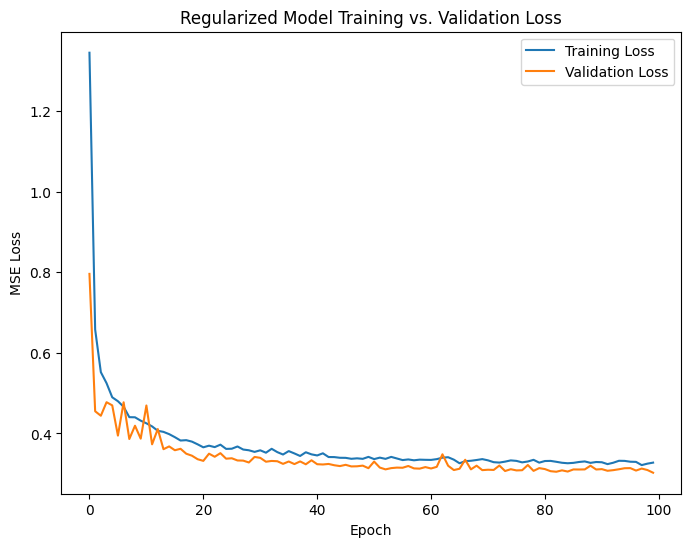

In [12]:
plt.figure(figsize=(8,6))
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Regularized Model Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()
